In [80]:
import numpy as np
import matplotlib.pyplot as plt

urn = ['R' ,'R', 'R', 'G', 'G', 'B']

We do not know, in principle, the probability distribution of the balls.

According to Bayes, we can estimate the probability $P(H|x)$ that the red balls are distributed according to $H$, when the result of a thrown is $x$. This is called the *posterior* probability (because it is estimated *after* an experiment)

$P(H|x) = \frac{P(H)P(x|H)}{P(x)}$

where $P(H)$ is the (subjective) prior attributed to the hypothesis $H$, $P(x|H)$ is the probability of throwing a ball of type $x$, given $H$. Such a probability is called the *likelihood* because it tells us how likely is the result $x$, given the hypothesis $H$. The prior $P(H)$ represents the probability of throwing a $x$ irrespective of the distribution of the balls. Indeed, it acts as a normalisation factor, so it can be computed by imposing the normalisation condition.

Given that the number of balls in the urn is 6, there are seven possible hypotheses:

1. no ball is red : $P(R|H_0)=0$
2. one ball is red: $P(R|H_1) = \frac{1}{6}$
3. two balls are red: $P(R|H_2) = \frac{2}{6}=\frac{1}{3}$
4. three balls are red: $P(R|H_3) = \frac{3}{6}=\frac{1}{2}$
5. four balls are red: $P(R|H_4) = \frac{4}{6}=\frac{2}{3}$
6. five balls are red: $P(R|H_5) = \frac{5}{6}$
7. all the balls are red: $P(R|H_6) = 1$.

A first guess could be that $P(H) = 1/7$, i.e., all the hypothesis have the same probability

Ball thrown: B
Hypothesis Prior Likelihood Numerator Posterior
         0  0.14       0.00      0.00      0.29
         1  0.14       0.00      0.14      0.24
         2  0.14       0.00      0.12      0.19
         3  0.14       0.00      0.10      0.14
         4  0.14       0.00      0.07      0.10
         5  0.14       0.00      0.05      0.05
         6  0.14       0.00      0.02      0.00
            1.00                           1.00


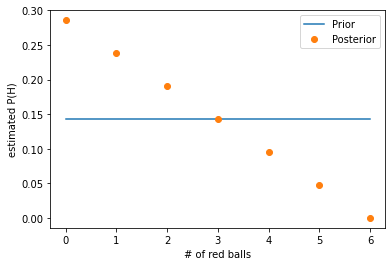

In [89]:
Likelihood = [0, 1/6, 1/3, 1/2, 2/3, 5/6, 1]
# change the following prior to find what happens if you choose it
# arbitrarily
Prior = [1/7]*len(Likelihood)

ball = urn[np.random.randint(0,6)]
print(f'Ball thrown: {ball}')
print('Hypothesis Prior Likelihood Numerator Posterior')

def updateProbability(Likelihood, Prior, verbose = True, plot = True):
    if not verbose:
        plot = False
    Px = 0
    BayesNumerator = [0]*len(Likelihood)
    Posterior = [0]*len(Likelihood)
    for nH in range(len(Likelihood)):
        PRH = Likelihood[nH]
        if ball != 'R':
            PRH = 1 - PRH
        BayesNumerator[nH] = Prior[nH]*PRH
        Px += BayesNumerator[nH]

    sumPrior = 0
    sumPosterior = 0
    for nH in range(len(Likelihood)):
        Posterior[nH] = BayesNumerator[nH]/Px
        sumPosterior += Posterior[nH]
        sumPrior += Prior[nH]
        if verbose:
            print(f'{nH:10} {Prior[nH]:5.2f} {PRH:10.2f} ' +
                  f'{BayesNumerator[nH-1]:9.2f} {Posterior[nH]:9.2f}')
    if verbose:
        print(f'{sumPrior:16.2f} {sumPosterior:30.2f}')
    if plot:
        plt.plot(range(0,7,1), Prior, '-', label = 'Prior')
        plt.plot(range(0,7,1), Posterior, 'o', label = 'Posterior')
        plt.xlabel('# of red balls')
        plt.ylabel('estimated P(H)')
        plt.legend()
        plt.show()
    return Posterior
        
Posterior = updateProbability(Likelihood, Prior)

Now that we updated our estimated probability, we can treat the posterior as our new prior and make another experiment

Ball thrown: R
Hypothesis Prior Likelihood Numerator Posterior
         0  0.29       1.00      0.00      0.00
         1  0.24       1.00      0.00      0.14
         2  0.19       1.00      0.04      0.23
         3  0.14       1.00      0.06      0.26
         4  0.10       1.00      0.07      0.23
         5  0.05       1.00      0.06      0.14
         6  0.00       1.00      0.04      0.00
            1.00                           1.00


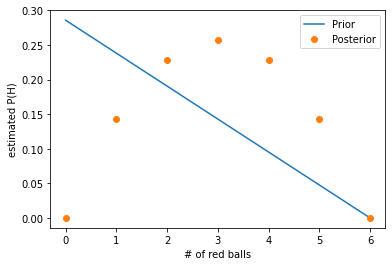

In [90]:
Prior = Posterior
ball = urn[np.random.randint(0,6)]
print(f'Ball thrown: {ball}')
print('Hypothesis Prior Likelihood Numerator Posterior')
Posterior = updateProbability(Likelihood, Prior)

Let's iterate

Ball thrown: R
Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       1.00      0.00      0.00
         1  0.14       1.00      0.00      0.05
         2  0.23       1.00      0.02      0.15
         3  0.26       1.00      0.08      0.26
         4  0.23       1.00      0.13      0.30
         5  0.14       1.00      0.15      0.24
         6  0.00       1.00      0.12      0.00
            1.00                           1.00


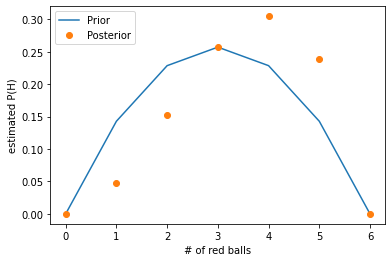

Ball thrown: G
Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       0.00      0.00      0.00
         1  0.05       0.00      0.00      0.10
         2  0.15       0.00      0.04      0.25
         3  0.26       0.00      0.10      0.31
         4  0.30       0.00      0.13      0.25
         5  0.24       0.00      0.10      0.10
         6  0.00       0.00      0.04      0.00
            1.00                           1.00


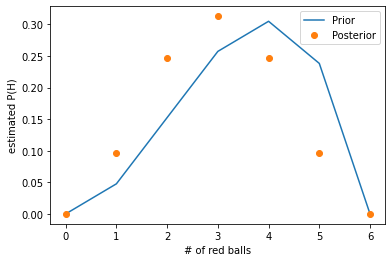

Ball thrown: R
Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       1.00      0.00      0.00
         1  0.10       1.00      0.00      0.03
         2  0.25       1.00      0.02      0.16
         3  0.31       1.00      0.08      0.31
         4  0.25       1.00      0.16      0.33
         5  0.10       1.00      0.16      0.16
         6  0.00       1.00      0.08      0.00
            1.00                           1.00


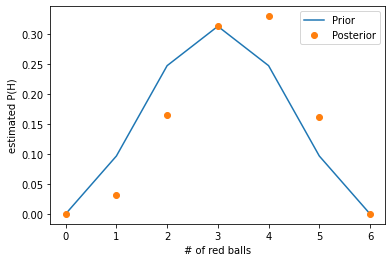

Ball thrown: B
Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       0.00      0.00      0.00
         1  0.03       0.00      0.00      0.06
         2  0.16       0.00      0.03      0.26
         3  0.31       0.00      0.11      0.36
         4  0.33       0.00      0.16      0.26
         5  0.16       0.00      0.11      0.06
         6  0.00       0.00      0.03      0.00
            1.00                           1.00


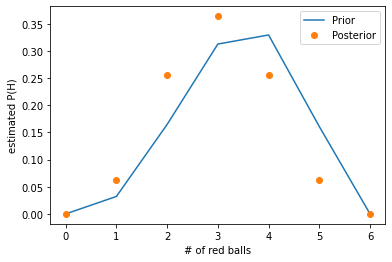

Ball thrown: R
Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       1.00      0.00      0.00
         1  0.06       1.00      0.00      0.02
         2  0.26       1.00      0.01      0.17
         3  0.36       1.00      0.09      0.36
         4  0.26       1.00      0.18      0.34
         5  0.06       1.00      0.17      0.10
         6  0.00       1.00      0.05      0.00
            1.00                           1.00


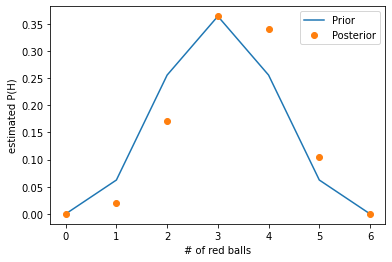

In [91]:
for i in range(5):
    Prior = Posterior
    ball = urn[np.random.randint(0,6)]
    print(f'Ball thrown: {ball}')
    print('Hypothesis Prior Likelihood Numerator Posterior')
    Posterior = updateProbability(Likelihood, Prior)

Let's iterate even more

Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       0.00      0.00      0.00
         1  0.00       0.00      0.00      0.00
         2  0.00       0.00      0.00      0.00
         3  1.00       0.00      0.00      1.00
         4  0.00       0.00      0.50      0.00
         5  0.00       0.00      0.00      0.00
         6  0.00       0.00      0.00      0.00
            1.00                           1.00


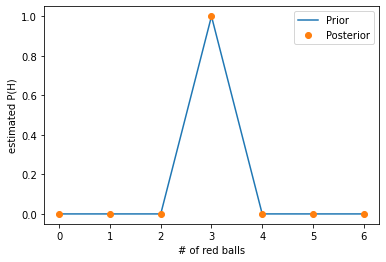

In [92]:
for i in range(200):
    Prior = Posterior
    ball = urn[np.random.randint(0,6)]
    Posterior = updateProbability(Likelihood, Prior, verbose = False)
    
print('Hypothesis Prior Likelihood Numerator Posterior')
Prior = Posterior
ball = urn[np.random.randint(0,6)]
Posterior = updateProbability(Likelihood, Prior)